In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

st_farm_out_dataset = pd.read_csv('SFarm_Outputs_1960_2004.csv')

In [3]:
st_farm_out_dataset.head()


,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1960,0.5668,0.6085,0.4063,3.3565,0.6274,0.1205,0.0889,0.8115,0.7119,...,0.8235,0.6198,2.2307,0.1885,0.5463,0.1571,0.5693,1.6851,0.1393,0.1755
1,1961,0.5765,0.6561,0.4236,3.3836,0.6363,0.1191,0.0867,0.8756,0.7621,...,0.7932,0.6418,2.2370,0.1871,0.5628,0.1620,0.5761,1.7360,0.1363,0.1763
2,1962,0.5604,0.6731,0.4392,3.5495,0.6212,0.1168,0.0865,0.9719,0.7421,...,0.8547,0.6172,2.1889,0.1975,0.5653,0.1588,0.6061,1.7720,0.1290,0.1807
3,1963,0.6288,0.7117,0.4559,3.5883,0.6260,0.1183,0.0916,0.8532,0.8442,...,0.8948,0.6555,2.3235,0.1971,0.5008,0.1575,0.6409,1.7240,0.1230,0.2003
4,1964,0.6314,0.7517,0.4292,3.6871,0.6235,0.1175,0.0902,0.8508,0.8278,...,0.8302,0.6837,2.2159,0.1932,0.5369,0.1565,0.6587,1.7165,0.1224,0.1968


one continous variable

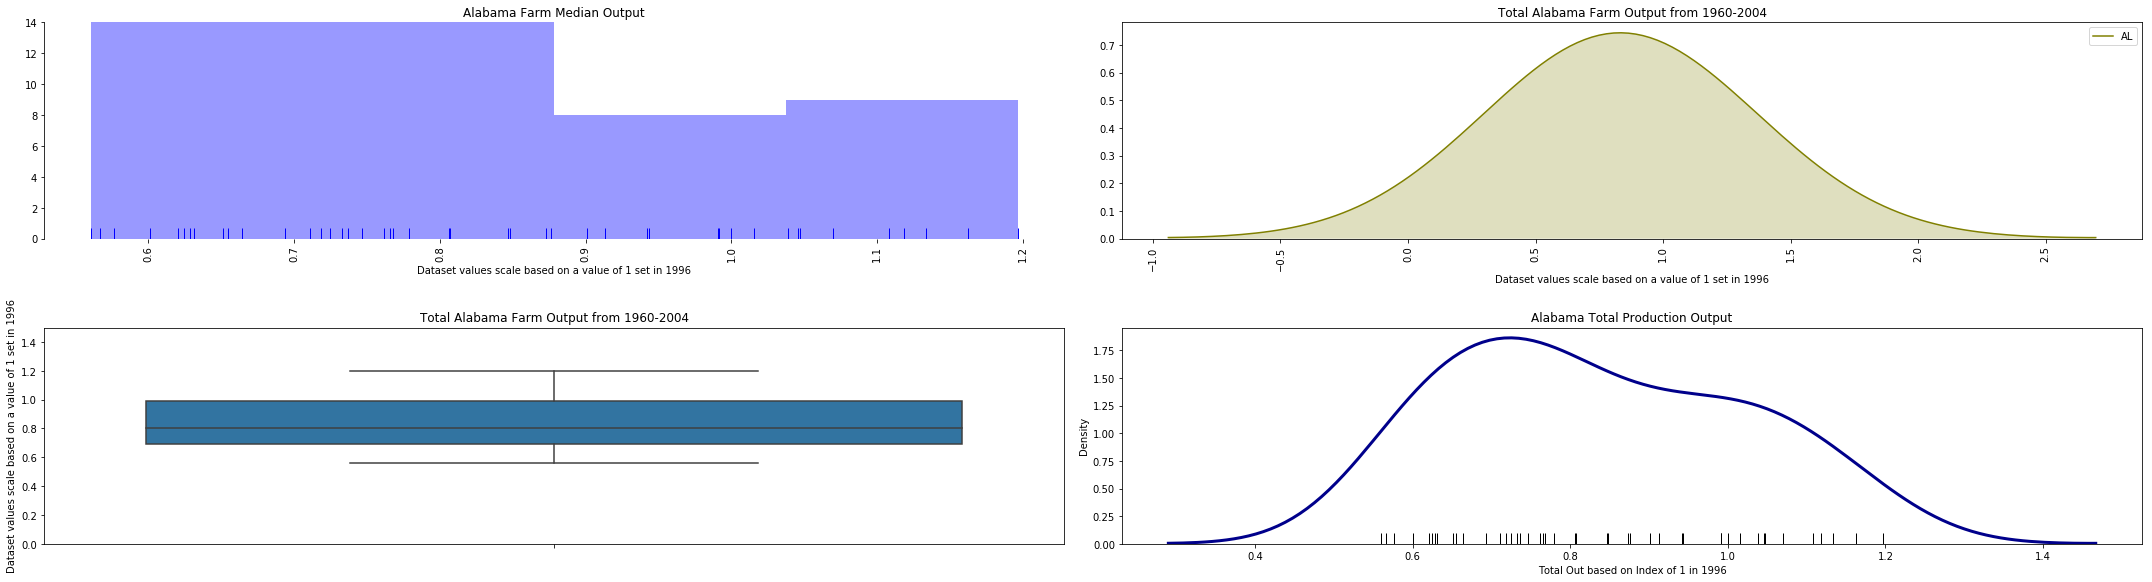

In [5]:
plt.figure(figsize=(30, 12))

plt.subplot(3, 2, 1)
sns.distplot(st_farm_out_dataset.AL, color="b", rug = True, kde = False)
plt.ylim(0, 14)
plt.title('Alabama Farm Median Output')
plt.xlabel("Dataset values scale based on a value of 1 set in 1996")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
sns.kdeplot(st_farm_out_dataset['AL'], shade=True, bw=.5, color="olive")
plt.title('Total Alabama Farm Output from 1960-2004')
plt.xlabel("Dataset values scale based on a value of 1 set in 1996")
plt.xticks(rotation = 90)

plt.subplot(3, 2, 3)
sns.boxplot(y= st_farm_out_dataset.AL)
plt.ylim(0, 1.5)
plt.title('Total Alabama Farm Output from 1960-2004')
plt.ylabel('Dataset values scale based on a value of 1 set in 1996')

plt.subplot(3, 2, 4)
sns.distplot(st_farm_out_dataset.AL, hist = False, kde = True, rug = True,

             color = 'darkblue', 

             kde_kws={'linewidth': 3},

             rug_kws={'color': 'black'})

# Plot formatting

plt.title('Alabama Total Production Output')

plt.xlabel('Total Out based on Index of 1 in 1996')

plt.ylabel('Density')
plt.tight_layout()
plt.show()

Two Continous Variables

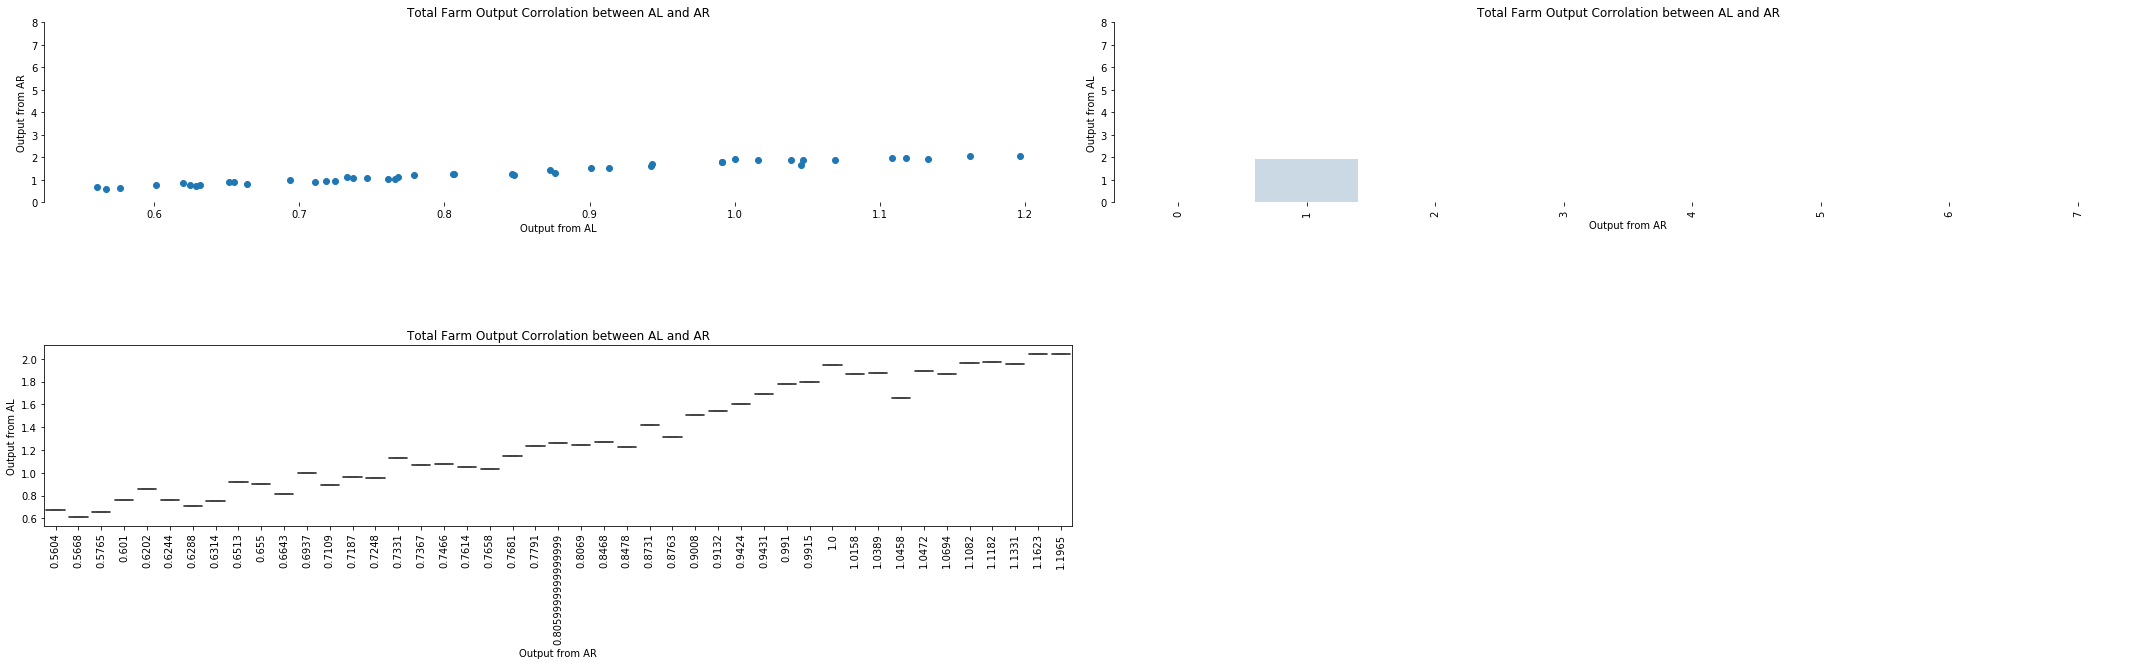

In [15]:
plt.figure(figsize=(30, 12))

plt.subplot(3, 2, 1)
plt.scatter(x=st_farm_out_dataset.AL, y=st_farm_out_dataset.AR)
plt.ylim(0, 8)
plt.ylabel('Output from AR')
plt.xlabel('Output from AL')
plt.title('Total Farm Output Corrolation between AL and AR')

plt.subplot(3, 2, 2)
sns.barplot(x= st_farm_out_dataset.AL, y= st_farm_out_dataset.AR, 
               label="Total Farm Output Corrolation between AL and AR", palette='BuPu', order=np.arange(0,8))
plt.ylim(0, 8)
plt.title('Total Farm Output Corrolation between AL and AR')
plt.xlabel("Output from AR")
plt.ylabel("Output from AL")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 3)
sns.boxplot(
    x=st_farm_out_dataset.AL,
    y=st_farm_out_dataset.AR,
    data=st_farm_out_dataset
)
plt.title('Total Farm Output Corrolation between AL and AR')
plt.xlabel("Output from AR")
plt.ylabel("Output from AL")
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

1 continous variable and 1 categorical variable

In [17]:

st_farm_melt = pd.melt(st_farm_out_dataset, id_vars=['Year'], value_vars=st_farm_out_dataset.columns.tolist()[1:])

In [18]:
st_farm_melt.head()

,Year,variable,value
0,1960,AL,0.5668
1,1961,AL,0.5765
2,1962,AL,0.5604
3,1963,AL,0.6288
4,1964,AL,0.6314


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


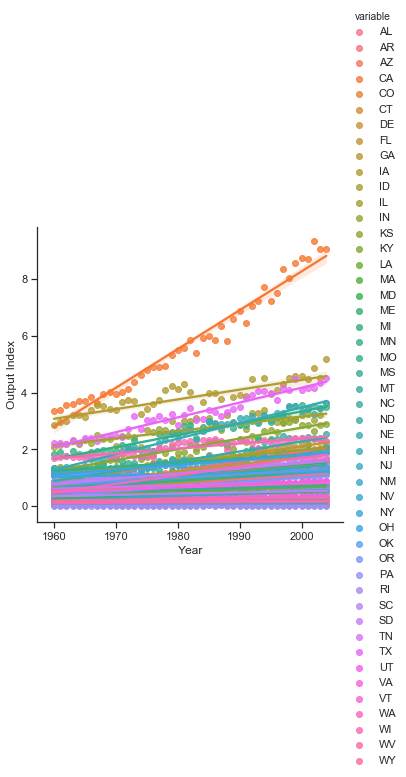

In [19]:

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="Year", y="value", hue="variable",
               truncate=True, height=5, data=st_farm_melt)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Output Index")

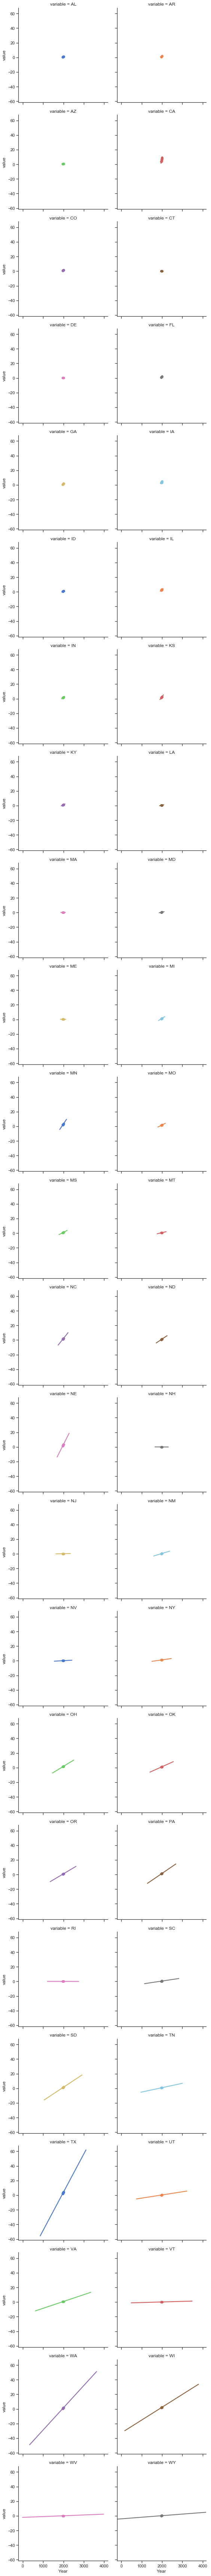

In [24]:
sns.set(style="ticks")
        
 # Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="value", col="variable", hue="variable", data=st_farm_melt,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 25, "alpha": 1})       

<Figure size 1152x864 with 0 Axes>

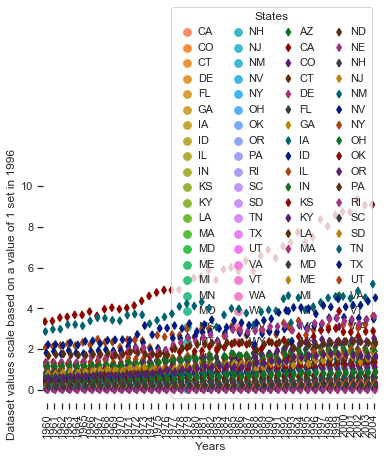

In [34]:
plt.figure(figsize=(16, 12))
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Year", y="value", hue="variable",
              data=st_farm_melt, dodge=True, jitter=True,
              alpha=.25, zorder=1)
plt.xticks(rotation = 90)

# Show the conditional means
sns.pointplot(x="Year", y="value", hue="variable",
              data=st_farm_melt, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.xticks(rotation = 90)
plt.xlabel("Years")
plt.ylabel("Dataset values scale based on a value of 1 set in 1996")
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="States",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=4, frameon=True)
plt.show()

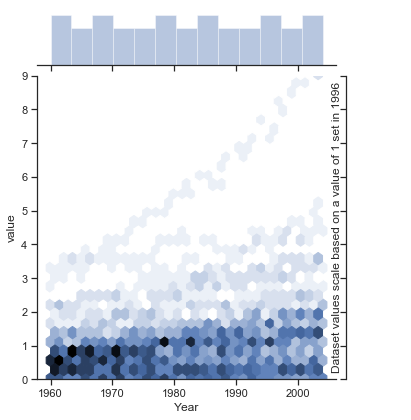

In [49]:
sns.jointplot(st_farm_melt['Year'], st_farm_melt['value'], kind="hex", color="b")
plt.xlim(1960, 2004)
plt.ylim(0, 9, .25)
plt.ylabel("Dataset values scale based on a value of 1 set in 1996")
plt.show()


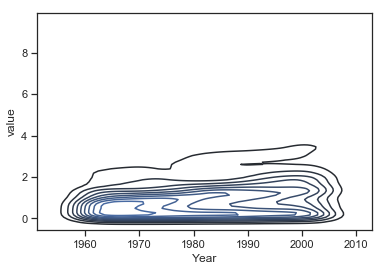

In [36]:
sns.kdeplot(st_farm_melt['Year'], st_farm_melt['value'])

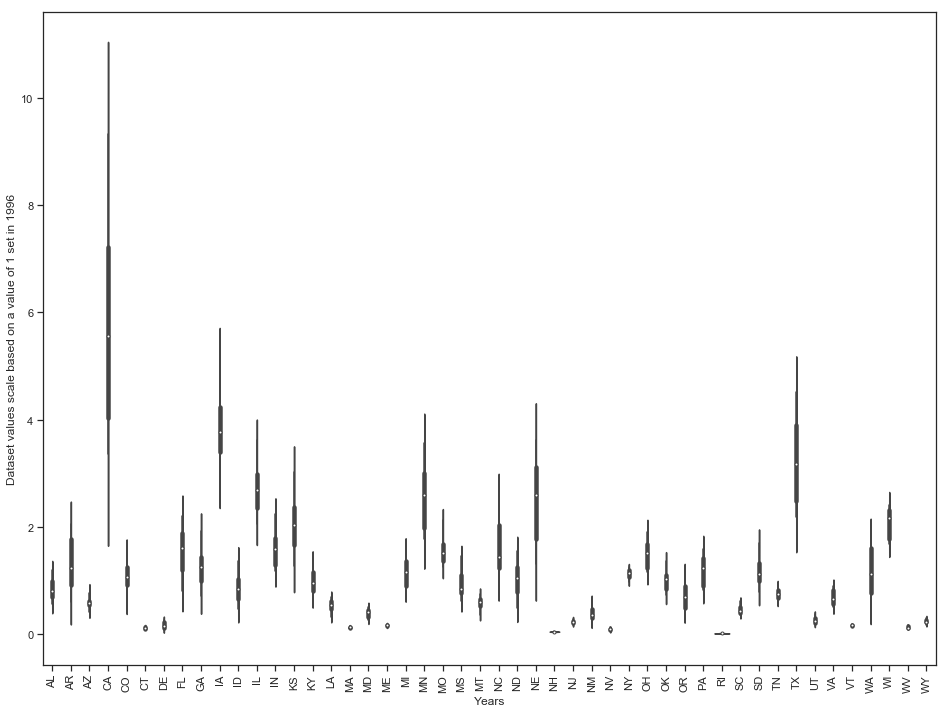

In [44]:
plt.figure(figsize=(16,12))
sns.violinplot(x='variable', y='value', data=st_farm_melt)
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Dataset values scale based on a value of 1 set in 1996")
plt.show()
